<h2>Notes -- Learn OPENCV in 3 Hours with Python  - by Hassan Murtaza</h2>

<h3><a class="anchor" id="toc">Table of Contents</a></h3>

0. [Preface - Initial Setup](#Preface)<br>
   [0.1 Python Libraries and Imports](#Img_Libs)<br>
1. [Ch 1 - How to Read Images Videos and Webcams](#Ch_1)<br>
   [1.1 Reading Images](#Ch_1_1)<br>
   [1.2 Capturing Videos and Webcam -- One Alternative](#Ch_1_2)<br>
2. [Ch 2 - Setup Python and IDE](#Ch_2)<br>
3. [Ch 3 - Resizing and Cropping Images](#Ch_3)<br>
   [3.1 Resizing](#Ch_3_1)<br>
   [3.2 Cropping](#Ch_3_2)<br>
4. [Ch 4 - How to Draw Shapes and Text](#Ch_4)<br>
5. [Ch 5 - Warp Prespective/BirdView](#Ch_5)<br>
6. [Ch 6 - Joining Multiple Images to Display](#Ch_6)<br>
7. [Ch 7 - Color Detection](#Ch_7)<br>
8. [Ch 8 - Contour/Shape Detection](#Ch_8)<br>
9. [Ch 9 - Face Detection](#Ch_9)<br>

<a class="anchor" id="Preface"></a>
<h3>0. Preface -- Initial Setup</h3>
<a href='#toc'>Return to TOC</a>

Routines that control the screen scrolling, fronted display, and definition of all libraries used throughout the notebook.

In [1]:
# enable all interactive output to be 'printed'
# and disable scrolling so long output can be displayed w/o scroll bars

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="Img_Libs"></a>
<h4>0.1 Python Libraries and Imports</h4>
<a href='#toc'>Return to TOC</a>

The declarations shown below are used throughout the notebook. They've been posted in one place to ensure that they are not duplicated or overlooked 

In [24]:
# common libraries and functions used with image libraries

# The Python 'os' module 'provides functions for interacting with the operating system'

import os
import numpy as np
import math
import cv2
import threading

# PyLab is a procedural interface to the Matplotlib object-oriented plotting library. 

import pylab as pl

# Matplotlib is image and data visualization library
# matplotlib.pyplot is a module in Matplotlib
# and PyLab is a module that gets installed alongside Matplotlib.

from matplotlib import pyplot as plt
import matplotlib.path as mpltPath
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import Video as vid

# methods for displaying and maintaining an image in jupyter frontend

from IPython.display import Image, display
#from IPython import display

# The name and path of the current working directory

img_path = os.getcwd() + "\\"
print(img_path)

# display arrangement used with a number of the 'detection' examples

def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver

# finds shape contours in cv2 images
def getContours(img):
    contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        print(area)
        if area>500:
            cv2.drawContours(imgContour, cnt, -1, (255, 0, 0), 3)
            peri = cv2.arcLength(cnt,True)
            #print(peri)
            approx = cv2.approxPolyDP(cnt,0.02*peri,True)
            print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)

            if objCor ==3: objectType ="Tri"
            elif objCor == 4:
                aspRatio = w/float(h)
                if aspRatio >0.98 and aspRatio <1.03: objectType= "Square"
                else:objectType="Rectangle"
            elif objCor>4: objectType= "Circles"
            else:objectType="None"

            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(imgContour,objectType,
                        (x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.7,
                        (0,0,0),2)

c:\Jupyter_Files\course-opencv-3hrs-murtaza-hassan\Learn-OpenCV-in-3-hours-master\


<a class="anchor" id="Ch_1"></a>
<h3>1. How to Read Images, Videos and the Webcam</h3>
<a href='#toc'>Return to TOC</a>

Simple CV commands for reading images, videos and webcams

<a class="anchor" id="Ch_1_1"></a>
<h3>1.1 Reading Images</h3>
<a href='#toc'>Return to TOC</a>

Shape of img = (512, 512, 3)


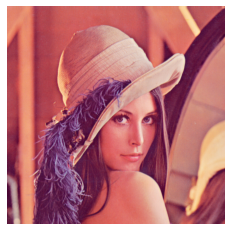

In [25]:
######################## READ IMAGE ############################

# by default cv2 uses BGR color scheme rather than RGB
img = cv2.imread("Resources/lena.png")
print(f'Shape of img = {img.shape}')

# DISPLAY image - use matplotlib to show in Jupyter notebook
# need to covert ('cvt') from BGR to RGB

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show();

# DISPLAY - use matplotlib imshow to simplify showing image in notebook
#cv2.imshow("Lena Soderberg",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

<a class="anchor" id="Ch_1_2"></a>
<h3>1.2 Capturing Videos and Webcam -- One Alternative</h3>
<a href='#toc'>Return to TOC</a>

The code below provides one alternative for video capturing either a recorded video or a webcam using 'cv2.VideoCapture'. Without going into too much detail, this particular alternative employs:

<ul> 
    <li>'threading' to improve the performance of the video stream</li><br>
    <li>'cv2.VideoCapture' to display either a video or the webcam stream</li><br>
    <li>ipython 'display', as opposed to 'cv2.imshow', to display the video or webcam</li><br>
    <li>a 'widgets.ToggleButton'to gracefully stop the video or webcam stream</li><br>
    <li>a flag ('repeatVideo') to enable repeating a video stream once it comes to the last frame (good for short streams</li><br>
    <li>a flag ('flipVideo') to flip the webcam if you want to mirror the webcam movements</li>
</ul>
        
    

In [6]:
# Reading Videos and Webcam

# Displaying Video capture
# ================
def view(button, flipVideo, videoName, repeatVideo):
    
    if videoName == '0':
        cap = cv2.VideoCapture(0)
    else:
        cap = cv2.VideoCapture(videoName)
        if repeatVideo:
            frame_counter = 0       
    
    display_handle=display(None, display_id=True)
    
    i = 0
    
    while True:
        _, frame = cap.read()
        
        if repeatVideo:
            frame_counter += 1
            #If the last frame is reached, reset the capture and the frame_counter
            if frame_counter == cap.get(cv2.CAP_PROP_FRAME_COUNT):
                frame_counter = 0 #Or whatever as long as it is the same as next line
                cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        
        # if your camera reverses your image
        if flipVideo:
            frame = cv2.flip(frame, 1)
        
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)
            break
            
# Run

stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square' # (FontAwesome names without the `fa-` prefix)
)

# To Show a regular video
#videoName = 'Resources/big_buck_bunny_240p_2mb.mp4'
#flipVideo = True # set to True if webcam flips the video output; otherwise set to False
#repeatVideo = True # set to True if you want the video to run over and over until stopped; otherwise set to False

# To capture webcam
videoName = '0' # use this if you want to capture the webcam
flipVideo = True
repeatVideo = False

display(stopButton)
thread = threading.Thread(target=view, args=(stopButton, flipVideo, videoName, repeatVideo))
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

None

<a class="anchor" id="Ch_2"></a>
<h3>2. Five Must Know OpenCV Basic Functions</h3>
<a href='#toc'>Return to TOC</a>

Five must know opencv functions for beginners. Gray Scale, Blur, Edge Detection, Dialation and Erosion.

(512, 512)


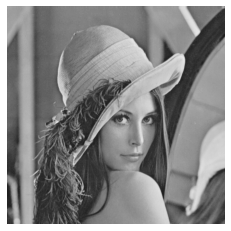

In [26]:
img = cv2.imread("Resources/lena.png")
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(imgGray.shape)
plt.imshow(imgGray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show();


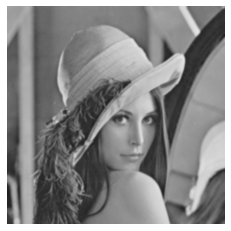

In [8]:
# Slight blurring of gray image
imgBlur = cv2.GaussianBlur(imgGray,(7,7),0)

plt.imshow(imgBlur, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show();

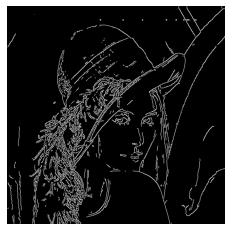

In [9]:
# Edge Detection
imgCanny = cv2.Canny(img,150,200)

plt.imshow(cv2.cvtColor(imgCanny, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show();

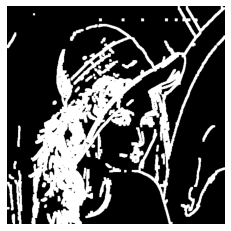

In [10]:
kernel = np.ones((5,5),np.uint8)
imgDialation = cv2.dilate(imgCanny,kernel,iterations=1)

plt.imshow(cv2.cvtColor(imgDialation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show();


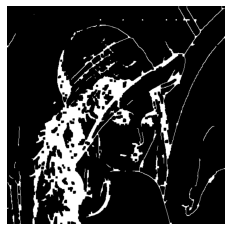

In [11]:
kernel = np.ones((5,5),np.uint8)
imgEroded = cv2.erode(imgDialation,kernel,iterations=1)

plt.imshow(cv2.cvtColor(imgEroded, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show();


<a class="anchor" id="Ch_2"></a>
<h3>3. Resizing and Cropping Images</h3>
<a href='#toc'>Return to TOC</a>

Shape of imgResize = (384, 256, 3)


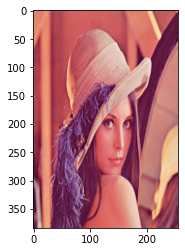

In [12]:
# resizing original image 'img'
w_resize = int(0.5 * img.shape[0])
h_resize = int(0.75 * img.shape[1])

imgResize = cv2.resize(img,(w_resize,h_resize))

print(f'Shape of imgResize = {imgResize.shape}')
plt.imshow(cv2.cvtColor(imgResize, cv2.COLOR_BGR2RGB));

Shape of imgCropped = (100, 100, 3)


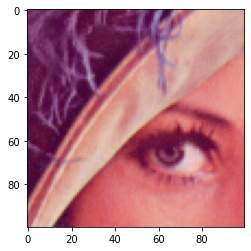

In [13]:
# cropping original image 'img'

imgCropped = img[200:300,200:300]

print(f'Shape of imgCropped = {imgCropped.shape}')
plt.imshow(cv2.cvtColor(imgCropped, cv2.COLOR_BGR2RGB));

<a class="anchor" id="Ch_4"></a>
<h3>4. How to Draw Shapes and Text</h3>
<a href='#toc'>Return to TOC</a>

Learn to create blank images along with how to draw Lines, rectangles, circles and custom text.

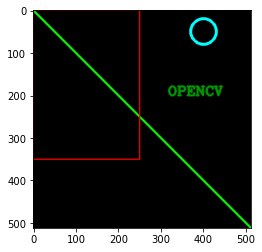

In [14]:
# create image from 512x512x3 np array of  black pixels
img = np.zeros((512,512,3),np.uint8)

cv2.line(img,(0,0),(img.shape[1],img.shape[0]),(0,255,0),3) #green color, width 3
cv2.rectangle(img,(0,0),(250,350),(0,0,255),2) #red color, width 2
cv2.circle(img,(400,50),30,(255,255,0),5) #radius 30, teal colo,r width 5
cv2.putText(img," OPENCV  ",(300,200),cv2.FONT_HERSHEY_COMPLEX,1,(0,150,0),3) #height 1, lighter green color, width 3

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show();

<a class="anchor" id="Ch_5"></a>
<h3>5. Warp Prespective/BirdView</h3>
<a href='#toc'>Return to TOC</a>

Learn how to creat a warp prespective of a selected area of an image using fixed points.

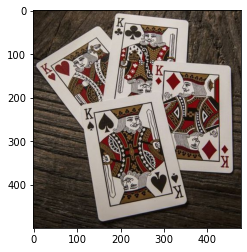

In [15]:
img = cv2.imread("Resources/cards.jpg")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show();

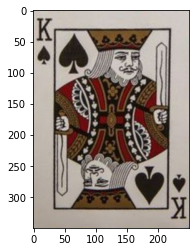

In [16]:
# crop and 'warp' single King of Spaces
# exact edge points in original deck image determined manually

width,height = 250,350 #width of standard card
pts1 = np.float32([[111,219],[287,188],[154,482],[352,440]])
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
imgOutput = cv2.warpPerspective(img,matrix,(width,height))

plt.imshow(cv2.cvtColor(imgOutput, cv2.COLOR_BGR2RGB))
plt.show();

<a class="anchor" id="Ch_6"></a>
<h3>6. Joining Multiple Images to Display</h3>
<a href='#toc'>Return to TOC</a>

Join multiple images together as one image for easy visualization of the workflow. Learn how to do it for smaller noumber of images and how it could be scaled up to have several images in the same image.

Shape of img: (512, 1024, 3)


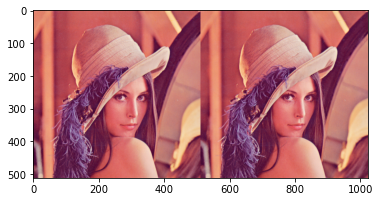

In [17]:
# Using np 'hstack' to stack two copies of image side by side
img = cv2.imread("Resources/lena.png")

imgHor = np.hstack((img,img))
print(f'Shape of img: {imgHor.shape}')

plt.imshow(cv2.cvtColor(imgHor, cv2.COLOR_BGR2RGB));
#plt.axis('off')
plt.show();

Shape of img: (1024, 512, 3)


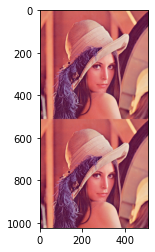

In [18]:
# Using np 'vstack' to stack two copies of image one on top of the other

imgVert = np.vstack((img,img))
print(f'Shape of img: {imgVert.shape}')

plt.imshow(cv2.cvtColor(imgVert, cv2.COLOR_BGR2RGB));
#plt.axis('off')
plt.show();

Shape of img: (512, 768, 3)


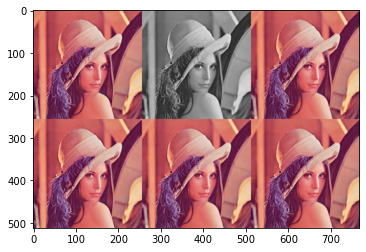

In [19]:
# create a 'gray' scale version of the image 'img'
# then create one horizontal grouping of img, imgGray, img
# and one grouping of img, img, img
# then stack the two groups one on top of the other using a
# customized function 'stackImages' defined in initial setup

imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

imgStack = stackImages(0.5,([img,imgGray,img],[img,img,img]))

print(f'Shape of img: {imgStack.shape}')

plt.imshow(cv2.cvtColor(imgStack, cv2.COLOR_BGR2RGB));
#plt.axis('off')
plt.show();

<a class="anchor" id="Ch_7"></a>
<h3>7. Color Detection</h3>
<a href='#toc'>Return to TOC</a>

Provides a method for detecting any color in an image using the HSV color space. In this process you first 
convert the image from the BGR color space to the hue (H), saturation (S) and value space (V) color space. Once this is done, you then create a color mask by iteratively adjusting the minimum and maximum values for each of the HSV elements and then applying the mask to the original image. Eventually, the object of interest (in this case a car) will be isolated from the rest of the image which is turned into background.

In the code below, the iterative adjustment is handled with IntSliders from the ipywidget library. In the original video tutorial, cv2 Trackbars are used (however these won't work appropriately in the Jupyter notebook format).

It should be noted that the response to IntSliders can be delayed, so leave a few seconds between adjustments to let the effects appear.

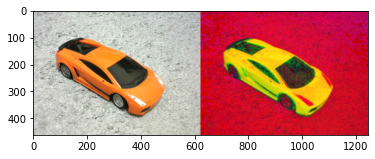

In [20]:
# convert  BRG img to imgHSV

path = 'Resources/lambo.jpg'

img = cv2.imread(path) #orig image BGR color scheme
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #conversion to HSV color scheme

imgHorz = np.hstack((img,imgHSV)) #display images side by side

# both img, imgHSV and imgHor involve BGR color schemes which need to be 
# converted to RGB before display

plt.imshow(cv2.cvtColor(imgHorz, cv2.COLOR_BGR2RGB));
#plt.axis('off')
plt.show();

In [27]:
# Create a mask and apply it (bit by bit) to the original image
# The application is done on an iterative basis by adjusting
# sliders controlling the min-max values for each of the HSV elements

path = 'Resources/lambo.jpg'

img = cv2.imread(path) #orig image BGR color scheme

h_min_widget = widgets.IntSlider(min=0, max=179, step=1)
h_max_widget = widgets.IntSlider(min=19, max=179, step=1)
s_min_widget = widgets.IntSlider(min=0, max=255, step=1)
s_max_widget = widgets.IntSlider(min=0, max=255, step=1)
v_min_widget = widgets.IntSlider(min=0, max=255, step=1)
v_max_widget = widgets.IntSlider(min=0, max=255, step=1)

def maskImg(img,h_min,h_max,s_min,s_max,v_min,v_max):
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #conversion to HSV color schem
    lower = np.array([h_min,s_min,v_min])
    upper = np.array([h_max,s_max,v_max])
    mask = cv2.inRange(imgHSV,lower,upper)
    imgResult = cv2.bitwise_and(img,img,mask=mask)
    imgStack = stackImages(0.6,([img,imgHSV],[mask,imgResult]))
    plt.imshow(cv2.cvtColor(imgStack, cv2.COLOR_BGR2RGB)); # converts BGR scheme to RGB for display
    plt.axis('off')
    plt.show();

widgets.interact(maskImg, img=fixed(img), h_min=h_min_widget, h_max=h_max_widget,s_min=s_min_widget,s_max = s_max_widget,v_min=v_min_widget,v_max=v_max_widget);

interactive(children=(IntSlider(value=0, description='h_min', max=179), IntSlider(value=19, description='h_max…

<a class="anchor" id="Ch_8"></a>
<h3>8. Contour/Shape Detection</h3>
<a href='#toc'>Return to TOC</a>

Detect shapes of objects by finding their contours. A contour is basically an outline that bounds the shape or form of an object. In the example that follows, the image contains multiple shapes each of which is a simple geometric objects (i.e. square, rectangle, circle or triangle).

The detection process involves a number of tramsformations Each of the shapes is a simple geometric objects. As a first step in the detection process

Combined imgContour, imgGray, imgBlur, and imgCanny images


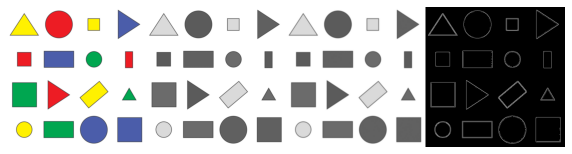

In [28]:
# 
path = 'Resources/shapes.png'

img = cv2.imread(path)
imgContour = img.copy()

imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray,(7,7),1)
imgCanny = cv2.Canny(imgBlur,50,50)

imgStack = stackImages(1.0,([imgContour,imgGray,imgBlur,imgCanny]))

print('Combined imgContour, imgGray, imgBlur, and imgCanny images')
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(imgStack, cv2.COLOR_BGR2RGB));
plt.axis('off')
plt.show();


In [ ]:
# detection of 4 shape types (triangle, circle, square and rectangle)
# using getContours function (see earlier initialization of libraries and functions)
# the way this function works is detailed in the function. The outcome is
# imgContour which locates each shape, outlines each with a light green rectangle
# that reflects its height and width and uses these to determine the number of edges
# and the length of the edges which in turn denotes its shape type.

getContours(imgCanny)

plt.imshow(cv2.cvtColor(imgContour, cv2.COLOR_BGR2RGB));
plt.show();

<a class="anchor" id="Ch_9"></a>
<h3>9. Face Detection</h3>
<a href='#toc'>Return to TOC</a>

Detecting faces in realtime using Viola Jones method. The key is that cv2's CascadeClassifier has code for identifying a number of objects within an image (e.g. faces).

Sample Cascades


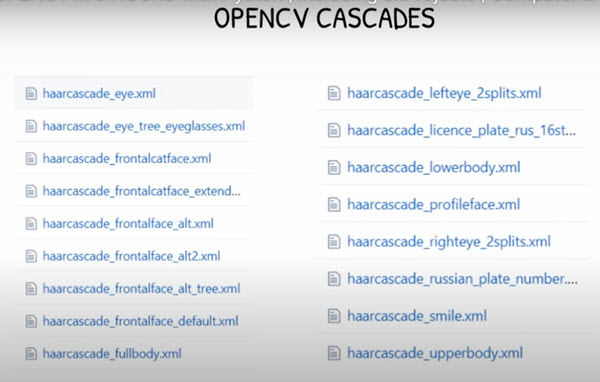

In [29]:
print("Sample Cascades")
from IPython.display import Image, display
display(Image(filename='Resources/cascades.jpg', embed=True))

Result


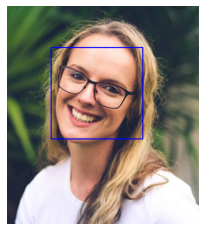

In [30]:
faceCascade = cv2.CascadeClassifier("Resources/haarcascade_frontalface_default.xml")

img = cv2.imread('Resources/womans_face.jpg')
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(imgGray,1.1,4)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

print("Result")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.axis('off')
plt.show();

Result - fairly accurate but not always


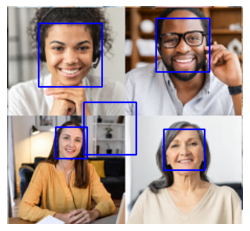

In [31]:
img = cv2.imread('Resources/many_faces.jpg')
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(imgGray,1.1,4)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

print("Result - fairly accurate but not always")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.axis('off')
plt.show();

<a class="anchor" id="Ch_9"></a>
<h3>10. Face Detection</h3>
<a href='#toc'>Return to TOC</a>

Detecting faces in realtime using Viola and Jones method. The key is that cv2's CascadeClassifier has code for identifying a number of objects within an image (e.g. faces).

In [ ]:
# Appendix Histogram of HSV values

path = 'Resources/lambo.png'
img = cv2.imread('Resources/red_pen.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)s

h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]

hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist_v = cv2.calcHist([v],[0],None,[256],[0,256])

plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")
plt.legend()
plt.show();

In [ ]:
# Create a mask and apply it (bit by bit) to the original image
# The application is done on an iterative basis by adjusting
# sliders controlling the min-max values for each of the HSV elements

#path = 'Resources/lambo.jpg'
#img = cv2.imread(path) #orig image BGR color scheme
frameWidth = 640
frameHeight = 480

img = cv2.VideoCapture(0)
img.set(3, frameWidth)
img.set(4, frameHeight)
img.set(10,150)


h_min_widget = widgets.IntSlider(min=0, max=179, step=1)
h_max_widget = widgets.IntSlider(min=19, max=179, step=1)
s_min_widget = widgets.IntSlider(min=0, max=255, step=1)
s_max_widget = widgets.IntSlider(min=0, max=255, step=1)
v_min_widget = widgets.IntSlider(min=0, max=255, step=1)
v_max_widget = widgets.IntSlider(min=0, max=255, step=1)

def maskImg(img,h_min,h_max,s_min,s_max,v_min,v_max):
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #conversion to HSV color scheme
    lower = np.array([h_min,s_min,v_min])
    upper = np.array([h_max,s_max,v_max])
    mask = cv2.inRange(imgHSV,lower,upper)
    imgResult = cv2.bitwise_and(img,img,mask=mask)
    imgStack = stackImages(0.6,([img,imgHSV],[mask,imgResult]))
    plt.imshow(cv2.cvtColor(imgStack, cv2.COLOR_BGR2RGB)); # converts BGR scheme to RGB for display
    plt.axis('off')
    plt.show();

interact(maskImg, img=fixed(img), h_min=h_min_widget, h_max=h_max_widget,s_min=s_min_widget,s_max = s_max_widget,v_min=v_min_widget,v_max=v_max_widget)

In [ ]:
# Capturing Webcam

# Stop button
# ================
stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square' # (FontAwesome names without the `fa-` prefix)
)

# Display function
# ================
def view(button):
    cap = cv2.VideoCapture(0)
    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        frame = cv2.flip(frame, 1) # if your camera reverses your image
        
        
        
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        
        
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)
            
# Run
# ================
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

In [ ]:
stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square' # (FontAwesome names without the `fa-` prefix)
)



#button = widgets.Button(description="Click Me!")
#output = widgets.Output()

display(stopButton)

print(stopButton.value)

#def on_button_clicked(b):
#    with output:
#        print("Button clicked.")

#stopButton.on_click(on_button_clicked)